In [1]:
import csv
import cv2
import os

# Directory containing video files
main_dir = r'C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test'  # Main directory containing subfolders

# Directory to save frames
output_dir = 'frames_final'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Emotion-specific directories
emotions = ['Boredom', 'Engagement', 'Confusion', 'Frustration']
for emotion in emotions:
    emotion_dir = os.path.join(output_dir, emotion)
    if not os.path.exists(emotion_dir):
        os.makedirs(emotion_dir)

# Function to extract maximum occurrence emotion from the CSV file
def get_max_occurrence_emotion(csv_file):
    max_occurrence_emotion = {}
    with open(csv_file, 'r') as file:
        reader = csv.DictReader(file)
        # Print column names for debugging
        header = reader.fieldnames
        print(f"CSV Header: {header}")
        for row in reader:
            clip_id = row['ClipID']
            emotions_count = {}
            for emotion in emotions:
                if emotion in row:
                    emotions_count[emotion] = int(row[emotion])
                else:
                    print(f"Emotion '{emotion}' not found in row: {row}")
            if emotions_count:
                max_value = max(emotions_count.values())
                max_emotions = [emotion for emotion, count in emotions_count.items() if count == max_value]
                if len(max_emotions) > 1:  # If there's a tie, use "Frustration"
                    max_emotion = 'Frustration'
                else:
                    max_emotion = max_emotions[0]
                max_occurrence_emotion[clip_id] = max_emotion
                print(f"Clip ID: {clip_id}, Emotions Count: {emotions_count}, Max Emotion: {max_emotion}")
    return max_occurrence_emotion

# Extract maximum occurrence emotion from CSV file
csv_file = r'C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\Labels\TestLabels.csv'  # Adjust path to your actual CSV file
max_occurrence_emotion = get_max_occurrence_emotion(csv_file)

def extract_and_save_frames(clip_id, video_path, max_occurrence_emotion, frame_interval=30):
    print(f"Processing video: {video_path}, Max occurrence emotion: {max_occurrence_emotion.get(clip_id)}")
    
    # Determine the emotion with maximum occurrence for this video
    max_emotion = max_occurrence_emotion.get(clip_id)
    if not max_emotion:
        print(f"No emotion found for video: {clip_id}")
        return
    
    # Create the directory for the max emotion if it doesn't exist
    emotion_dir = os.path.join(output_dir, max_emotion)
    if not os.path.exists(emotion_dir):
        os.makedirs(emotion_dir)
    
    # Capture the video
    cap = cv2.VideoCapture(video_path)
    success, frame = cap.read()
    if not success:
        print(f"Failed to read the video file: {video_path}")
        return

    frame_number = 0
    saved_frames = 0

    while success:
        if frame_number % frame_interval == 0:
            # Save frame as image
            frame_name = os.path.join(emotion_dir, f"{os.path.splitext(clip_id)[0]}_frame{frame_number}.jpg")
            cv2.imwrite(frame_name, frame)
            saved_frames += 1
            
        # Move to the next frame
        frame_number += 1
        success, frame = cap.read()

    cap.release()
    print(f"Finished processing video: {video_path}, Saved frames: {saved_frames}")

# Function to recursively get all video files in the directory
def get_all_video_files(dir_path):
    video_files = []
    for root, dirs, files in os.walk(dir_path):
        for file in files:
            if file.endswith(('.avi', '.mp4', '.mkv')):  # Add other video formats if needed
                video_files.append(os.path.join(root, file))
    return video_files

# Get all video files in the main directory
video_files = get_all_video_files(main_dir)
print(f"Found {len(video_files)} video files.")

# Limit the number of videos processed (optional)
max_videos = 1866  # Set this to None to process all videos, or set a limit
if max_videos:
    video_files = video_files[:max_videos]

# Process each video file found and save frames in the directory of max occurrence emotion
for video_file in video_files:
    clip_id = os.path.basename(video_file)
    extract_and_save_frames(clip_id, video_file, max_occurrence_emotion)

print("Frames extracted and saved successfully.")


CSV Header: ['ClipID', 'Boredom', 'Engagement', 'Confusion', 'Frustration ']
Emotion 'Frustration' not found in row: {'ClipID': '5000441001.avi', 'Boredom': '1', 'Engagement': '2', 'Confusion': '0', 'Frustration ': '0'}
Clip ID: 5000441001.avi, Emotions Count: {'Boredom': 1, 'Engagement': 2, 'Confusion': 0}, Max Emotion: Engagement
Emotion 'Frustration' not found in row: {'ClipID': '5000441002.avi', 'Boredom': '0', 'Engagement': '2', 'Confusion': '0', 'Frustration ': '0'}
Clip ID: 5000441002.avi, Emotions Count: {'Boredom': 0, 'Engagement': 2, 'Confusion': 0}, Max Emotion: Engagement
Emotion 'Frustration' not found in row: {'ClipID': '5000441003.avi', 'Boredom': '1', 'Engagement': '2', 'Confusion': '0', 'Frustration ': '0'}
Clip ID: 5000441003.avi, Emotions Count: {'Boredom': 1, 'Engagement': 2, 'Confusion': 0}, Max Emotion: Engagement
Emotion 'Frustration' not found in row: {'ClipID': '5000441005.avi', 'Boredom': '2', 'Engagement': '2', 'Confusion': '0', 'Frustration ': '0'}
Clip ID: 

Found 1866 video files.
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500044\5000441001\5000441001.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500044\5000441001\5000441001.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500044\5000441002\5000441002.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500044\5000441002\5000441002.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500044\5000441003\5000441003.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500044\5000441003\5000441003.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500044\5000441005\5000441005.avi, Max occurrence emotion:

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500044\5000441039\5000441039.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500044\5000441040\5000441040.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500044\5000441040\5000441040.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500044\5000441041\5000441041.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500044\5000441041\5000441041.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500044\5000441042\5000441042.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500044\5000441042\5000441042.avi, Saved frames: 10
Processing video: C:\

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500044\5000442002\5000442002.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500044\5000442003\5000442003.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500044\5000442003\5000442003.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500044\5000442004\5000442004.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500044\5000442004\5000442004.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500044\5000442005\5000442005.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500044\5000442005\5000442005.avi, Saved frames: 10
Processing video: C

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500044\5000442045\5000442045.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500044\5000442047\5000442047.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500044\5000442047\5000442047.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500044\5000442048\5000442048.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500044\5000442048\5000442048.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500044\5000442050\5000442050.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500044\5000442050\5000442050.avi, Saved frames: 10
Processing video: C:\

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500067\5000671001\5000671001.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500067\5000671002\5000671002.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500067\5000671002\5000671002.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500067\5000671003\5000671003.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500067\5000671003\5000671003.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500067\5000671004\5000671004.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500067\5000671004\5000671004.avi, Saved frames: 10
Processing video: C:\

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500067\5000671034\5000671034.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500067\5000671035\5000671035.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500067\5000671035\5000671035.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500067\5000671036\5000671036.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500067\5000671036\5000671036.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500067\5000671037\5000671037.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500067\5000671037\5000671037.avi, Saved frames: 10
Processing video: C:\

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500067\5000671069\5000671069.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500067\5000671070\5000671070.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500067\5000671070\5000671070.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500067\5000671071\5000671071.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500067\5000671071\5000671071.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500067\5000672002\5000672002.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500067\5000672002\5000672002.avi, Saved frames: 10
Processing video: C

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500067\5000672036\5000672036.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500067\5000672038\5000672038.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500067\5000672038\5000672038.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500067\5000672042\5000672042.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500067\5000672042\5000672042.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500067\5000672043\5000672043.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500067\5000672043\5000672043.avi, Saved frames: 10
Processing video: C:\

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500067\5000672074\5000672074.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500067\5000672075\5000672075.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500067\5000672075\5000672075.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500067\5000672076\5000672076.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500067\5000672076\5000672076.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500067\5000672077\5000672077.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500067\5000672077\5000672077.avi, Saved frames: 10
Processing video: C:\

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500095\5000951033\5000951033.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500095\5000951034\5000951034.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500095\5000951034\5000951034.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500095\5000951035\5000951035.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500095\5000951035\5000951035.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500095\5000951037\5000951037.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500095\5000951037\5000951037.avi, Saved frames: 10
Processing video: C

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500095\5000952005\5000952005.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500095\5000952007\5000952007.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500095\5000952007\5000952007.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500095\5000952008\5000952008.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500095\5000952008\5000952008.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500095\5000952011\5000952011.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500095\5000952011\5000952011.avi, Saved frames: 10
Processing video: C:

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500095\5000952044\5000952044.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500095\5000952045\5000952045.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500095\5000952045\5000952045.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500095\5000952046\5000952046.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500095\5000952046\5000952046.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500095\5000952048\5000952048.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\500095\5000952048\5000952048.avi, Saved frames: 10
Processing video: C:\

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510009\5100091004\5100091004.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510009\5100091005\5100091005.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510009\5100091005\5100091005.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510009\5100091006\5100091006.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510009\5100091006\5100091006.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510009\5100091007\5100091007.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510009\5100091007\5100091007.avi, Saved frames: 10
Processing video: C:\

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510009\5100091057\5100091057.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510009\5100091058\5100091058.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510009\5100091058\5100091058.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510009\5100091059\5100091059.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510009\5100091059\5100091059.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510009\5100091062\5100091062.avi, Max occurrence emotion: Confusion
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510009\5100091062\5100091062.avi, Saved frames: 10
Processing video: C:\U

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510009\5100092038\5100092038.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510009\5100092039\5100092039.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510009\5100092039\5100092039.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510009\5100092040\5100092040.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510009\5100092040\5100092040.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510009\5100092041\5100092041.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510009\5100092041\5100092041.avi, Saved frames: 10
Processing video: C:\

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510034\5100341012\5100341012.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510034\5100341013\5100341013.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510034\5100341013\5100341013.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510034\5100341014\5100341014.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510034\5100341014\5100341014.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510034\5100341015\5100341015.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510034\5100341015\5100341015.avi, Saved frames: 10
Processing video: C:\

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510034\5100341052\5100341052.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510034\5100341054\5100341054.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510034\5100341054\5100341054.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510034\5100341055\5100341055.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510034\5100341055\5100341055.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510034\5100341056\5100341056.avi, Max occurrence emotion: Boredom
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510034\5100341056\5100341056.avi, Saved frames: 10
Processing video: C:\Use

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510034\5100342022\5100342022.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510034\5100342023\5100342023.avi, Max occurrence emotion: Boredom
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510034\5100342023\5100342023.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510034\5100342024\5100342024.avi, Max occurrence emotion: Boredom
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510034\5100342024\5100342024.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510034\5100342025\5100342025.avi, Max occurrence emotion: Boredom
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510034\5100342025\5100342025.avi, Saved frames: 10
Processing video: C:\Users\HP\

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510035\5100351025\5100351025.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510035\5100351026\5100351026.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510035\5100351026\5100351026.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510035\5100351032\5100351032.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510035\5100351032\5100351032.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510035\5100351034\5100351034.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510035\5100351034\5100351034.avi, Saved frames: 10
Processing video: C:\

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510035\5100352014\5100352014.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510035\5100352015\5100352015.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510035\5100352015\5100352015.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510035\5100352016\5100352016.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510035\5100352016\5100352016.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510035\5100352017\5100352017.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510035\5100352017\5100352017.avi, Saved frames: 10
Processing video: C

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510035\5100352054\5100352054.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510035\5100352055\5100352055.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510035\5100352055\5100352055.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510035\5100352056\5100352056.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510035\5100352056\5100352056.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510035\5100352057\5100352057.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510035\5100352057\5100352057.avi, Saved frames: 10
Processing video: C:\

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510037\5100372011\5100372011.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510037\5100372015\5100372015.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510037\5100372015\5100372015.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510037\5100372016\5100372016.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510037\5100372016\5100372016.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510037\5100372017\5100372017.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510037\5100372017\5100372017.avi, Saved frames: 10
Processing video: C:\

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510038\5100381020\5100381020.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510038\5100381021\5100381021.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510038\5100381021\5100381021.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510038\5100381022\5100381022.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510038\5100381022\5100381022.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510038\5100381023\5100381023.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510038\5100381023\5100381023.avi, Saved frames: 10
Processing video: C:\

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510038\5100381054\5100381054.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510038\5100381055\5100381055.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510038\5100381055\5100381055.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510038\5100381056\5100381056.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510038\5100381056\5100381056.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510038\5100381058\5100381058.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510038\5100381058\5100381058.avi, Saved frames: 10
Processing video: C:\

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510038\5100382026\5100382026.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510038\5100382027\5100382027.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510038\5100382027\5100382027.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510038\5100382028\5100382028.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510038\5100382028\5100382028.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510038\5100382029\5100382029.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510038\5100382029\5100382029.avi, Saved frames: 10
Processing video: C:\

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510038\5100382061\5100382061.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510038\5100382062\5100382062.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510038\5100382062\5100382062.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510038\5100382063\5100382063.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510038\5100382063\5100382063.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510038\5100382064\5100382064.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510038\5100382064\5100382064.avi, Saved frames: 10
Processing video: C:\

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510040\5100401018\5100401018.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510040\5100401021\5100401021.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510040\5100401021\5100401021.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510040\5100401022\5100401022.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510040\5100401022\5100401022.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510040\5100401023\5100401023.avi, Max occurrence emotion: Boredom
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510040\5100401023\5100401023.avi, Saved frames: 10
Processing video: C:\Use

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510040\5100401055\5100401055.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510040\5100401056\5100401056.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510040\5100401056\5100401056.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510040\5100401057\5100401057.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510040\5100401057\5100401057.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510040\5100401059\5100401059.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510040\5100401059\5100401059.avi, Saved frames: 10
Processing video: C:\

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510040\5100402012\5100402012.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510040\5100402015\5100402015.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510040\5100402015\5100402015.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510040\5100402016\5100402016.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510040\5100402016\5100402016.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510040\5100402017\5100402017.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510040\5100402017\5100402017.avi, Saved frames: 10
Processing video: C:\

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510040\5100402057\5100402057.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510040\5100402058\5100402058.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510040\5100402058\5100402058.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510040\5100402059\5100402059.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510040\5100402059\5100402059.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510040\5100402062\5100402062.avi, Max occurrence emotion: Boredom
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510040\5100402062\5100402062.avi, Saved frames: 10
Processing video: C:\Us

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510042\5100421029\5100421029.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510042\5100421032\5100421032.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510042\5100421032\5100421032.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510042\5100421033\5100421033.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510042\5100421033\5100421033.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510042\5100421034\5100421034.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510042\5100421034\5100421034.avi, Saved frames: 10
Processing video: C:\

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510042\5100421069\5100421069.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510042\5100421070\5100421070.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510042\5100421070\5100421070.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510042\5100421071\5100421071.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510042\5100421071\5100421071.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510042\5100421072\5100421072.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510042\5100421072\5100421072.avi, Saved frames: 10
Processing video: C:\

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510042\5100422025\5100422025.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510042\5100422026\5100422026.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510042\5100422026\5100422026.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510042\5100422027\5100422027.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510042\5100422027\5100422027.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510042\5100422028\5100422028.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510042\5100422028\5100422028.avi, Saved frames: 10
Processing video: C:\

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510042\5100422062\5100422062.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510042\5100422063\5100422063.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510042\5100422063\5100422063.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510042\5100422065\5100422065.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510042\5100422065\5100422065.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510042\5100422066\5100422066.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510042\5100422066\5100422066.avi, Saved frames: 10
Processing video: C:

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510045\5100451019\5100451019.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510045\5100451020\5100451020.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510045\5100451020\5100451020.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510045\5100451024\5100451024.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510045\5100451024\5100451024.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510045\5100451026\5100451026.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510045\5100451026\5100451026.avi, Saved frames: 10
Processing video: C:\

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510045\5100452004\5100452004.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510045\5100452005\5100452005.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510045\5100452005\5100452005.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510045\5100452006\5100452006.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510045\5100452006\5100452006.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510045\5100452007\5100452007.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510045\5100452007\5100452007.avi, Saved frames: 10
Processing video: C:\

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510045\5100452047\5100452047.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510045\5100452049\5100452049.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510045\5100452049\5100452049.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510045\5100452050\5100452050.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510045\5100452050\5100452050.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510045\5100452053\5100452053.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510045\5100452053\5100452053.avi, Saved frames: 10
Processing video: C:\

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510046\5100461020\5100461020.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510046\5100461021\5100461021.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510046\5100461021\5100461021.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510046\5100461022\5100461022.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510046\5100461022\5100461022.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510046\5100461023\5100461023.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510046\5100461023\5100461023.avi, Saved frames: 10
Processing video: C:\

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510046\5100461056\5100461056.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510046\5100461057\5100461057.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510046\5100461057\5100461057.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510046\5100461058\5100461058.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510046\5100461058\5100461058.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510046\5100461061\5100461061.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510046\5100461061\5100461061.avi, Saved frames: 10
Processing video: C:

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510046\5100462025\5100462025.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510046\5100462026\5100462026.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510046\5100462026\5100462026.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510046\5100462027\5100462027.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510046\5100462027\5100462027.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510046\5100462028\5100462028.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510046\5100462028\5100462028.avi, Saved frames: 10
Processing video: C:

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510046\5100462061\5100462061.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510046\5100462062\5100462062.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510046\5100462062\5100462062.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510046\5100462063\5100462063.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510046\5100462063\5100462063.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510046\5100462064\5100462064.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510046\5100462064\5100462064.avi, Saved frames: 10
Processing video: C:

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510047\5100471021\5100471021.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510047\5100471023\5100471023.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510047\5100471023\5100471023.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510047\5100471026\5100471026.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510047\5100471026\5100471026.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510047\5100471027\5100471027.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510047\5100471027\5100471027.avi, Saved frames: 10
Processing video: C

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510047\5100471068\5100471068.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510047\5100471069\5100471069.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510047\5100471069\5100471069.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510047\5100471070\5100471070.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510047\5100471070\5100471070.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510047\5100471072\5100471072.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510047\5100471072\5100471072.avi, Saved frames: 10
Processing video: C:\

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510047\5100472042\5100472042.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510047\5100472044\5100472044.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510047\5100472044\5100472044.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510047\5100472045\5100472045.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510047\5100472045\5100472045.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510047\5100472047\5100472047.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\510047\5100472047\5100472047.avi, Saved frames: 10
Processing video: C

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\826412\8264120132\8264120132.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\826412\8264120136\8264120136.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\826412\8264120136\8264120136.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\826412\8264120139\8264120139.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\826412\8264120139\8264120139.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\826412\8264120141\8264120141.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\826412\8264120141\8264120141.avi, Saved frames: 10
Processing video: C:

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\826412\8264120228\8264120228.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\826412\8264120229\8264120229.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\826412\8264120229\8264120229.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\826412\826412023\826412023.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\826412\826412023\826412023.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\826412\8264120231\8264120231.avi, Max occurrence emotion: Boredom
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\826412\8264120231\8264120231.avi, Saved frames: 10
Processing video: C:\Users\

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\826412\8264120274\8264120274.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\826412\8264120275\8264120275.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\826412\8264120275\8264120275.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\826412\8264120279\8264120279.avi, Max occurrence emotion: Boredom
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\826412\8264120279\8264120279.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\826412\8264120280\8264120280.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\826412\8264120280\8264120280.avi, Saved frames: 10
Processing video: C:\Us

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\882654\88265401450\88265401450.mp4, Saved frames: 11
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\882654\88265401470\88265401470.mp4, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\882654\88265401470\88265401470.mp4, Saved frames: 11
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\882654\88265401480\88265401480.mp4, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\882654\88265401480\88265401480.mp4, Saved frames: 11
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\882654\88265401490\88265401490.mp4, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\882654\88265401490\88265401490.mp4, Saved frames: 11
Process

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\882654\88265402320\88265402320.mp4, Saved frames: 11
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\882654\88265402330\88265402330.mp4, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\882654\88265402330\88265402330.mp4, Saved frames: 11
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\882654\88265402340\88265402340.mp4, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\882654\88265402340\88265402340.mp4, Saved frames: 11
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\882654\88265402350\88265402350.mp4, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\882654\88265402350\88265402350.mp4, Saved frames: 11
Process

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\882654\8826540280\8826540280.mp4, Saved frames: 11
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\882654\88265402800\88265402800.mp4, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\882654\88265402800\88265402800.mp4, Saved frames: 11
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\882654\88265402810\88265402810.mp4, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\882654\88265402810\88265402810.mp4, Saved frames: 11
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\882654\88265402820\88265402820.mp4, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\882654\88265402820\88265402820.mp4, Saved frames: 11
Processin

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\907001\907001360\907001360.mp4, Saved frames: 11
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\907001\907001370\907001370.mp4, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\907001\907001370\907001370.mp4, Saved frames: 11
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\907001\907001400\907001400.mp4, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\907001\907001400\907001400.mp4, Saved frames: 11
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\907001\907001430\907001430.mp4, Max occurrence emotion: Boredom
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\907001\907001430\907001430.mp4, Saved frames: 11
Processing video: C:\Users\HP\Download

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\907001\90700190\90700190.mp4, Saved frames: 11
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\907001\907001910\907001910.mp4, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\907001\907001910\907001910.mp4, Saved frames: 11
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\907001\907001940\907001940.mp4, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\907001\907001940\907001940.mp4, Saved frames: 11
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\907001\907001950\907001950.mp4, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\907001\907001950\907001950.mp4, Saved frames: 11
Processing video: C:\Users\HP\Downlo

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\928901\9289010151\9289010151.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\928901\9289010152\9289010152.avi, Max occurrence emotion: Boredom
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\928901\9289010152\9289010152.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\928901\9289010153\9289010153.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\928901\9289010153\9289010153.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\928901\9289010154\9289010154.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\928901\9289010154\9289010154.avi, Saved frames: 10
Processing video: C:\Use

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\928901\9289010244\9289010244.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\928901\9289010245\9289010245.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\928901\9289010245\9289010245.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\928901\9289010248\9289010248.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\928901\9289010248\9289010248.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\928901\9289010249\9289010249.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\928901\9289010249\9289010249.avi, Saved frames: 10
Processing video: C:\

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\940328\9403280110\9403280110.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\940328\9403280112\9403280112.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\940328\9403280112\9403280112.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\940328\9403280114\9403280114.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\940328\9403280114\9403280114.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\940328\9403280115\9403280115.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\940328\9403280115\9403280115.avi, Saved frames: 10
Processing video: C:\

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\940328\9403280167\9403280167.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\940328\940328017\940328017.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\940328\940328017\940328017.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\940328\940328018\940328018.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\940328\940328018\940328018.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\940328\9403280212\9403280212.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\940328\9403280212\9403280212.avi, Saved frames: 10
Processing video: C:\Users\H

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\940328\9403280266\9403280266.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\940328\9403280271\9403280271.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\940328\9403280271\9403280271.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\940328\9403280272\9403280272.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\940328\9403280272\9403280272.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\940328\9403280273\9403280273.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\940328\9403280273\9403280273.avi, Saved frames: 10
Processing video: C:

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\987736\9877360147\9877360147.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\987736\9877360149\9877360149.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\987736\9877360149\9877360149.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\987736\987736015\987736015.avi, Max occurrence emotion: Confusion
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\987736\987736015\987736015.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\987736\9877360151\9877360151.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\987736\9877360151\9877360151.avi, Saved frames: 10
Processing video: C:\Users

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\987736\9877360185\9877360185.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\987736\9877360210\9877360210.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\987736\9877360210\9877360210.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\987736\9877360212\9877360212.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\987736\9877360212\9877360212.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\987736\9877360213\9877360213.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\987736\9877360213\9877360213.avi, Saved frames: 10
Processing video: C:\

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\987736\9877360256\9877360256.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\987736\9877360258\9877360258.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\987736\9877360258\9877360258.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\987736\9877360259\9877360259.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\987736\9877360259\9877360259.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\987736\9877360261\9877360261.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Test\987736\9877360261\9877360261.avi, Saved frames: 10
Processing video: C:\

In [1]:
import csv
import cv2
import os

# Directory containing video files
main_dir = r'C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train'  # Main directory containing subfolders

# Directory to save frames
output_dir = 'frames_final1'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Emotion-specific directories
emotions = ['Boredom', 'Engagement', 'Confusion', 'Frustration']
for emotion in emotions:
    emotion_dir = os.path.join(output_dir, emotion)
    if not os.path.exists(emotion_dir):
        os.makedirs(emotion_dir)

# Function to extract maximum occurrence emotion from the CSV file
def get_max_occurrence_emotion(csv_file):
    max_occurrence_emotion = {}
    with open(csv_file, 'r') as file:
        reader = csv.DictReader(file)
        # Print column names for debugging
        header = reader.fieldnames
        print(f"CSV Header: {header}")
        for row in reader:
            clip_id = row['ClipID']
            emotions_count = {}
            for emotion in emotions:
                if emotion in row:
                    emotions_count[emotion] = int(row[emotion])
                else:
                    print(f"Emotion '{emotion}' not found in row: {row}")
            if emotions_count:
                max_value = max(emotions_count.values())
                max_emotions = [emotion for emotion, count in emotions_count.items() if count == max_value]
                if len(max_emotions) > 1:  # If there's a tie, use "Frustration"
                    max_emotion = 'Frustration'
                else:
                    max_emotion = max_emotions[0]
                max_occurrence_emotion[clip_id] = max_emotion
                print(f"Clip ID: {clip_id}, Emotions Count: {emotions_count}, Max Emotion: {max_emotion}")
    return max_occurrence_emotion

# Extract maximum occurrence emotion from CSV file
csv_file = r"C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\Labels\TrainLabels.csv"  # Adjust path to your actual CSV file
max_occurrence_emotion = get_max_occurrence_emotion(csv_file)

def extract_and_save_frames(clip_id, video_path, max_occurrence_emotion, frame_interval=30):
    print(f"Processing video: {video_path}, Max occurrence emotion: {max_occurrence_emotion.get(clip_id)}")
    
    # Determine the emotion with maximum occurrence for this video
    max_emotion = max_occurrence_emotion.get(clip_id)
    if not max_emotion:
        print(f"No emotion found for video: {clip_id}")
        return
    
    # Create the directory for the max emotion if it doesn't exist
    emotion_dir = os.path.join(output_dir, max_emotion)
    if not os.path.exists(emotion_dir):
        os.makedirs(emotion_dir)
    
    # Capture the video
    cap = cv2.VideoCapture(video_path)
    success, frame = cap.read()
    if not success:
        print(f"Failed to read the video file: {video_path}")
        return

    frame_number = 0
    saved_frames = 0

    while success:
        if frame_number % frame_interval == 0:
            # Save frame as image
            frame_name = os.path.join(emotion_dir, f"{os.path.splitext(clip_id)[0]}_frame{frame_number}.jpg")
            cv2.imwrite(frame_name, frame)
            saved_frames += 1
            
        # Move to the next frame
        frame_number += 1
        success, frame = cap.read()

    cap.release()
    print(f"Finished processing video: {video_path}, Saved frames: {saved_frames}")

# Function to recursively get all video files in the directory
def get_all_video_files(dir_path):
    video_files = []
    for root, dirs, files in os.walk(dir_path):
        for file in files:
            if file.endswith(('.avi', '.mp4', '.mkv')):  # Add other video formats if needed
                video_files.append(os.path.join(root, file))
    return video_files

# Get all video files in the main directory
video_files = get_all_video_files(main_dir)
print(f"Found {len(video_files)} video files.")

# Limit the number of videos processed (optional)
max_videos = 1866  # Set this to None to process all videos, or set a limit
if max_videos:
    video_files = video_files[:max_videos]

# Process each video file found and save frames in the directory of max occurrence emotion
for video_file in video_files:
    clip_id = os.path.basename(video_file)
    extract_and_save_frames(clip_id, video_file, max_occurrence_emotion)

print("Frames extracted and saved successfully.")


CSV Header: ['ClipID', 'Boredom', 'Engagement', 'Confusion', 'Frustration ']
Emotion 'Frustration' not found in row: {'ClipID': '1100011002.avi', 'Boredom': '0', 'Engagement': '2', 'Confusion': '0', 'Frustration ': '0'}
Clip ID: 1100011002.avi, Emotions Count: {'Boredom': 0, 'Engagement': 2, 'Confusion': 0}, Max Emotion: Engagement
Emotion 'Frustration' not found in row: {'ClipID': '1100011003.avi', 'Boredom': '0', 'Engagement': '2', 'Confusion': '0', 'Frustration ': '0'}
Clip ID: 1100011003.avi, Emotions Count: {'Boredom': 0, 'Engagement': 2, 'Confusion': 0}, Max Emotion: Engagement
Emotion 'Frustration' not found in row: {'ClipID': '1100011004.avi', 'Boredom': '0', 'Engagement': '3', 'Confusion': '0', 'Frustration ': '0'}
Clip ID: 1100011004.avi, Emotions Count: {'Boredom': 0, 'Engagement': 3, 'Confusion': 0}, Max Emotion: Engagement
Emotion 'Frustration' not found in row: {'ClipID': '1100011005.avi', 'Boredom': '0', 'Engagement': '3', 'Confusion': '0', 'Frustration ': '0'}
Clip ID: 

Found 5481 video files.
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110001\1100011002\1100011002.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110001\1100011002\1100011002.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110001\1100011003\1100011003.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110001\1100011003\1100011003.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110001\1100011004\1100011004.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110001\1100011004\1100011004.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110001\1100011005\1100011005.avi, Max occurrence e

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110001\1100011034\1100011034.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110001\1100011035\1100011035.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110001\1100011035\1100011035.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110001\1100011037\1100011037.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110001\1100011037\1100011037.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110001\1100011038\1100011038.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110001\1100011038\1100011038.avi, Saved frames: 10
Processing vid

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110001\1100011072\1100011072.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110001\1100011073\1100011073.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110001\1100011073\1100011073.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110001\1100011075\1100011075.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110001\1100011075\1100011075.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110001\1100011076\1100011076.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110001\1100011076\1100011076.avi, Saved frames: 10
Processing vid

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110001\1100012028\1100012028.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110001\1100012030\1100012030.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110001\1100012030\1100012030.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110001\1100012031\1100012031.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110001\1100012031\1100012031.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110001\1100012032\1100012032.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110001\1100012032\1100012032.avi, Saved frames: 10
Processing vid

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110002\1100021015\1100021015.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110002\1100021038\1100021038.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110002\1100021038\1100021038.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110002\1100021039\1100021039.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110002\1100021039\1100021039.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110002\1100021040\1100021040.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110002\1100021040\1100021040.avi, Saved frames: 10
Processing vi

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110002\1100022047\1100022047.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110002\1100022048\1100022048.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110002\1100022048\1100022048.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110002\1100022049\1100022049.avi, Max occurrence emotion: Confusion
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110002\1100022049\1100022049.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110002\1100022051\1100022051.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110002\1100022051\1100022051.avi, Saved frames: 10
Processing vi

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110004\1100042019\1100042019.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110004\1100042020\1100042020.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110004\1100042020\1100042020.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110004\1100042023\1100042023.avi, Max occurrence emotion: Boredom
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110004\1100042023\1100042023.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110004\1100042024\1100042024.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110004\1100042024\1100042024.avi, Saved frames: 10
Processing video

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110005\1100051021\1100051021.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110005\1100051022\1100051022.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110005\1100051022\1100051022.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110005\1100051023\1100051023.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110005\1100051023\1100051023.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110005\1100051024\1100051024.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110005\1100051024\1100051024.avi, Saved frames: 10
Processing v

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110005\1100051055\1100051055.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110005\1100051056\1100051056.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110005\1100051056\1100051056.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110005\1100051057\1100051057.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110005\1100051057\1100051057.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110005\1100051059\1100051059.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110005\1100051059\1100051059.avi, Saved frames: 10
Processing vid

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110005\1100052032\1100052032.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110005\1100052033\1100052033.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110005\1100052033\1100052033.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110005\1100052035\1100052035.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110005\1100052035\1100052035.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110005\1100052036\1100052036.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110005\1100052036\1100052036.avi, Saved frames: 10
Processing vid

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110006\1100061019\1100061019.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110006\1100061022\1100061022.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110006\1100061022\1100061022.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110006\1100061023\1100061023.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110006\1100061023\1100061023.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110006\1100061025\1100061025.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110006\1100061025\1100061025.avi, Saved frames: 10
Processing vi

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110006\1100061063\1100061063.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110006\1100061064\1100061064.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110006\1100061064\1100061064.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110006\1100061067\1100061067.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110006\1100061067\1100061067.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110006\1100061068\1100061068.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110006\1100061068\1100061068.avi, Saved frames: 10
Processing vid

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110006\1100062060\1100062060.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110006\1100062061\1100062061.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110006\1100062061\1100062061.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110006\1100062062\1100062062.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110006\1100062062\1100062062.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110006\1100062063\1100062063.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110006\1100062063\1100062063.avi, Saved frames: 10
Processing vi

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110007\1100071021\1100071021.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110007\1100071022\1100071022.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110007\1100071022\1100071022.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110007\1100071023\1100071023.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110007\1100071023\1100071023.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110007\1100071024\1100071024.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110007\1100071024\1100071024.avi, Saved frames: 10
Processing 

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110007\1100071056\1100071056.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110007\1100071057\1100071057.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110007\1100071057\1100071057.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110007\1100071058\1100071058.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110007\1100071058\1100071058.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110007\1100071059\1100071059.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110007\1100071059\1100071059.avi, Saved frames: 10
Processing vi

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110007\1100072006\1100072006.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110007\1100072007\1100072007.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110007\1100072007\1100072007.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110007\1100072008\1100072008.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110007\1100072008\1100072008.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110007\1100072009\1100072009.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110007\1100072009\1100072009.avi, Saved frames: 10
Processing vi

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110007\1100072043\1100072043.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110007\1100072045\1100072045.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110007\1100072045\1100072045.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110007\1100072047\1100072047.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110007\1100072047\1100072047.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110007\1100072048\1100072048.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110007\1100072048\1100072048.avi, Saved frames: 10
Processing v

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110007\1100072076\1100072076.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110007\1100072077\1100072077.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110007\1100072077\1100072077.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110007\1100072078\1100072078.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110007\1100072078\1100072078.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110007\1100072079\1100072079.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110007\1100072079\1100072079.avi, Saved frames: 10
Processing vid

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110011\1100111014\1100111014.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110011\1100111016\1100111016.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110011\1100111016\1100111016.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110011\1100111017\1100111017.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110011\1100111017\1100111017.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110011\1100111018\1100111018.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110011\1100111018\1100111018.avi, Saved frames: 10
Processing vi

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110011\1100112018\1100112018.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110011\1100112021\1100112021.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110011\1100112021\1100112021.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110011\1100112022\1100112022.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110011\1100112022\1100112022.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110011\1100112024\1100112024.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110011\1100112024\1100112024.avi, Saved frames: 10
Processing vid

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110011\1100112060\1100112060.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110011\1100112061\1100112061.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110011\1100112061\1100112061.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110011\1100112062\1100112062.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110011\1100112062\1100112062.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110011\1100112063\1100112063.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110011\1100112063\1100112063.avi, Saved frames: 10
Processing vid

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110012\1100121032\1100121032.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110012\1100121033\1100121033.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110012\1100121033\1100121033.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110012\1100121034\1100121034.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110012\1100121034\1100121034.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110012\1100121035\1100121035.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110012\1100121035\1100121035.avi, Saved frames: 10
Processing vi

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110012\1100122008\1100122008.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110012\1100122009\1100122009.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110012\1100122009\1100122009.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110012\1100122010\1100122010.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110012\1100122010\1100122010.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110012\1100122011\1100122011.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110012\1100122011\1100122011.avi, Saved frames: 10
Processing vid

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110012\1100122047\1100122047.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110012\1100122048\1100122048.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110012\1100122048\1100122048.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110012\1100122050\1100122050.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110012\1100122050\1100122050.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110012\1100122051\1100122051.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110012\1100122051\1100122051.avi, Saved frames: 10
Processing vid

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110014\1100141014\1100141014.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110014\1100141015\1100141015.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110014\1100141015\1100141015.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110014\1100141016\1100141016.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110014\1100141016\1100141016.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110014\1100141017\1100141017.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110014\1100141017\1100141017.avi, Saved frames: 10
Processing vi

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110014\1100141055\1100141055.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110014\1100141056\1100141056.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110014\1100141056\1100141056.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110014\1100141057\1100141057.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110014\1100141057\1100141057.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110014\1100142002\1100142002.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110014\1100142002\1100142002.avi, Saved frames: 10
Processing vi

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110014\1100142035\1100142035.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110014\1100142038\1100142038.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110014\1100142038\1100142038.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110014\1100142041\1100142041.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110014\1100142041\1100142041.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110014\1100142043\1100142043.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110014\1100142043\1100142043.avi, Saved frames: 10
Processing vi

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110015\1100151017\1100151017.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110015\1100151018\1100151018.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110015\1100151018\1100151018.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110015\1100151019\1100151019.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110015\1100151019\1100151019.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110015\1100151020\1100151020.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110015\1100151020\1100151020.avi, Saved frames: 10
Processing v

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110015\1100151058\1100151058.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110015\1100151062\1100151062.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110015\1100151062\1100151062.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110015\1100152001\1100152001.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110015\1100152001\1100152001.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110015\1100152004\1100152004.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110015\1100152004\1100152004.avi, Saved frames: 10
Processing vi

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110015\1100152050\1100152050.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110015\1100152051\1100152051.avi, Max occurrence emotion: Confusion
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110015\1100152051\1100152051.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110015\1100152055\1100152055.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110015\1100152055\1100152055.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110015\1100152056\1100152056.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110015\1100152056\1100152056.avi, Saved frames: 10
Processing vide

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110016\1100161043\1100161043.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110016\1100161044\1100161044.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110016\1100161044\1100161044.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110016\1100161045\1100161045.avi, Max occurrence emotion: Confusion
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110016\1100161045\1100161045.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110016\1100161046\1100161046.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110016\1100161046\1100161046.avi, Saved frames: 10
Processing vid

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110017\1100171031\1100171031.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110017\1100171035\1100171035.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110017\1100171035\1100171035.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110017\1100171036\1100171036.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110017\1100171036\1100171036.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110017\1100171038\1100171038.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110017\1100171038\1100171038.avi, Saved frames: 10
Processing v

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110017\1100171080\1100171080.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110017\1100171083\1100171083.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110017\1100171083\1100171083.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110017\1100172003\1100172003.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110017\1100172003\1100172003.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110017\1100172004\1100172004.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110017\1100172004\1100172004.avi, Saved frames: 10
Processing vid

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110017\1100172063\1100172063.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110017\1100172066\1100172066.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110017\1100172066\1100172066.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110041\1100411010\1100411010.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110041\1100411010\1100411010.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110041\1100411011\1100411011.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110041\1100411011\1100411011.avi, Saved frames: 10
Processing vi

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110041\1100412039\1100412039.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110041\1100412040\1100412040.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\110041\1100412040\1100412040.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\111003\1110031003\1110031003.avi, Max occurrence emotion: Confusion
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\111003\1110031003\1110031003.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\111003\1110031007\1110031007.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\111003\1110031007\1110031007.avi, Saved frames: 10
Processing vid

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\111003\1110032002\1110032002.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\111003\1110032004\1110032004.avi, Max occurrence emotion: Confusion
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\111003\1110032004\1110032004.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\111003\1110032006\1110032006.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\111003\1110032006\1110032006.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\111003\1110032008\1110032008.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\111003\1110032008\1110032008.avi, Saved frames: 10
Processing vide

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\111003\1110032050\1110032050.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\111003\1110032051\1110032051.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\111003\1110032051\1110032051.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\111003\1110032052\1110032052.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\111003\1110032052\1110032052.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\111003\1110032053\1110032053.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\111003\1110032053\1110032053.avi, Saved frames: 10
Processing 

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\181374\1813740143\1813740143.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\181374\1813740144\1813740144.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\181374\1813740144\1813740144.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\181374\1813740149\1813740149.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\181374\1813740149\1813740149.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\181374\181374015\181374015.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\181374\181374015\181374015.avi, Saved frames: 10
Processing video:

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\181374\1813740185\1813740185.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\181374\181374019\181374019.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\181374\181374019\181374019.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\181374\1813740210\1813740210.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\181374\1813740210\1813740210.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\181374\1813740211\1813740211.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\181374\1813740211\1813740211.avi, Saved frames: 10
Processing video: 

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\181374\1813740243\1813740243.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\181374\1813740245\1813740245.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\181374\1813740245\1813740245.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\181374\1813740249\1813740249.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\181374\1813740249\1813740249.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\181374\181374025\181374025.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\181374\181374025\181374025.avi, Saved frames: 10
Processing video: 

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\181374\1813740274\1813740274.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\181374\1813740275\1813740275.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\181374\1813740275\1813740275.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\181374\1813740276\1813740276.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\181374\1813740276\1813740276.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\181374\1813740277\1813740277.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\181374\1813740277\1813740277.avi, Saved frames: 10
Processing vid

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200048\2000482044\2000482044.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200048\2000482049\2000482049.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200048\2000482049\2000482049.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200048\2000482050\2000482050.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200048\2000482050\2000482050.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200048\2000482052\2000482052.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200048\2000482052\2000482052.avi, Saved frames: 10
Processing vi

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200050\2000501009\2000501009.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200050\2000501010\2000501010.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200050\2000501010\2000501010.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200050\2000501011\2000501011.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200050\2000501011\2000501011.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200050\2000501012\2000501012.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200050\2000501012\2000501012.avi, Saved frames: 10
Processing vi

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200050\2000501046\2000501046.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200050\2000501049\2000501049.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200050\2000501049\2000501049.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200050\2000501050\2000501050.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200050\2000501050\2000501050.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200050\2000501051\2000501051.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200050\2000501051\2000501051.avi, Saved frames: 10
Processing v

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200050\2000502014\2000502014.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200050\2000502015\2000502015.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200050\2000502015\2000502015.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200050\2000502019\2000502019.avi, Max occurrence emotion: Boredom
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200050\2000502019\2000502019.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200050\2000502020\2000502020.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200050\2000502020\2000502020.avi, Saved frames: 10
Processing video:

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200050\2000502063\2000502063.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200050\2000502065\2000502065.avi, Max occurrence emotion: Boredom
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200050\2000502065\2000502065.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200050\2000502066\2000502066.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200050\2000502066\2000502066.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200050\2000502067\2000502067.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200050\2000502067\2000502067.avi, Saved frames: 10
Processing video:

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200054\2000541020\2000541020.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200054\2000541021\2000541021.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200054\2000541021\2000541021.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200054\2000541022\2000541022.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200054\2000541022\2000541022.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200054\2000541023\2000541023.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200054\2000541023\2000541023.avi, Saved frames: 10
Processing vid

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200054\2000541056\2000541056.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200054\2000541057\2000541057.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200054\2000541057\2000541057.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200054\2000541059\2000541059.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200054\2000541059\2000541059.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200054\2000541062\2000541062.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200054\2000541062\2000541062.avi, Saved frames: 10
Processing vid

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200054\2000542021\2000542021.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200054\2000542022\2000542022.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200054\2000542022\2000542022.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200054\2000542025\2000542025.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200054\2000542025\2000542025.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200054\2000542026\2000542026.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\200054\2000542026\2000542026.avi, Saved frames: 10
Processing vid

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\202614\2026140126\2026140126.mp4, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\202614\2026140128\2026140128.mp4, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\202614\2026140128\2026140128.mp4, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\202614\2026140129\2026140129.mp4, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\202614\2026140129\2026140129.mp4, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\202614\2026140130\2026140130.mp4, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\202614\2026140130\2026140130.mp4, Saved frames: 10
Processing vi

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\202614\2026140210\2026140210.mp4, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\202614\2026140212\2026140212.mp4, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\202614\2026140212\2026140212.mp4, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\202614\2026140213\2026140213.mp4, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\202614\2026140213\2026140213.mp4, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\202614\2026140220\2026140220.mp4, Max occurrence emotion: Boredom
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\202614\2026140220\2026140220.mp4, Saved frames: 10
Processing video:

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\202614\2026140272\2026140272.mp4, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\202614\2026140273\2026140273.mp4, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\202614\2026140273\2026140273.mp4, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\202614\2026140275\2026140275.mp4, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\202614\2026140275\2026140275.mp4, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\202614\2026140276\2026140276.mp4, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\202614\2026140276\2026140276.mp4, Saved frames: 10
Processing vi

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\205601\2056010148\2056010148.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\205601\2056010149\2056010149.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\205601\2056010149\2056010149.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\205601\2056010153\2056010153.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\205601\2056010153\2056010153.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\205601\2056010155\2056010155.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\205601\2056010155\2056010155.avi, Saved frames: 10
Processing vid

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\205601\2056010233\2056010233.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\205601\2056010234\2056010234.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\205601\2056010234\2056010234.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\205601\2056010235\2056010235.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\205601\2056010235\2056010235.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\205601\2056010236\2056010236.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\205601\2056010236\2056010236.avi, Saved frames: 10
Processing vi

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\205601\2056010272\2056010272.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\205601\2056010274\2056010274.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\205601\2056010274\2056010274.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\205601\2056010275\2056010275.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\205601\2056010275\2056010275.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\205601\2056010276\2056010276.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\205601\2056010276\2056010276.avi, Saved frames: 10
Processing vid

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210051\2100511038\2100511038.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210051\2100511039\2100511039.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210051\2100511039\2100511039.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210051\2100511040\2100511040.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210051\2100511040\2100511040.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210051\2100511044\2100511044.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210051\2100511044\2100511044.avi, Saved frames: 10
Processing vi

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210051\2100512002\2100512002.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210051\2100512003\2100512003.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210051\2100512003\2100512003.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210051\2100512006\2100512006.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210051\2100512006\2100512006.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210051\2100512007\2100512007.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210051\2100512007\2100512007.avi, Saved frames: 10
Processing vi

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210051\2100512045\2100512045.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210051\2100512051\2100512051.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210051\2100512051\2100512051.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210051\2100512052\2100512052.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210051\2100512052\2100512052.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210051\2100512053\2100512053.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210051\2100512053\2100512053.avi, Saved frames: 10
Processing vi

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210052\2100521026\2100521026.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210052\2100521027\2100521027.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210052\2100521027\2100521027.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210052\2100521028\2100521028.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210052\2100521028\2100521028.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210052\2100521029\2100521029.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210052\2100521029\2100521029.avi, Saved frames: 10
Processing vid

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210052\2100521059\2100521059.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210052\2100521060\2100521060.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210052\2100521060\2100521060.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210052\2100521061\2100521061.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210052\2100521061\2100521061.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210052\2100521062\2100521062.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210052\2100521062\2100521062.avi, Saved frames: 10
Processing vid

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210052\2100522020\2100522020.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210052\2100522021\2100522021.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210052\2100522021\2100522021.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210052\2100522023\2100522023.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210052\2100522023\2100522023.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210052\2100522024\2100522024.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210052\2100522024\2100522024.avi, Saved frames: 10
Processing vid

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210052\2100522061\2100522061.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210052\2100522062\2100522062.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210052\2100522062\2100522062.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210052\2100522063\2100522063.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210052\2100522063\2100522063.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210052\2100522064\2100522064.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210052\2100522064\2100522064.avi, Saved frames: 10
Processing vi

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210053\2100531026\2100531026.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210053\2100531027\2100531027.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210053\2100531027\2100531027.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210053\2100531028\2100531028.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210053\2100531028\2100531028.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210053\2100531030\2100531030.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210053\2100531030\2100531030.avi, Saved frames: 10
Processing vi

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210053\2100531060\2100531060.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210053\2100531061\2100531061.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210053\2100531061\2100531061.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210053\2100531063\2100531063.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210053\2100531063\2100531063.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210053\2100531064\2100531064.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210053\2100531064\2100531064.avi, Saved frames: 10
Processing vid

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210053\2100532013\2100532013.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210053\2100532015\2100532015.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210053\2100532015\2100532015.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210053\2100532016\2100532016.avi, Max occurrence emotion: Boredom
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210053\2100532016\2100532016.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210053\2100532017\2100532017.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Train\210053\2100532017\2100532017.avi, Saved frames: 10
Processing video

In [2]:
import csv
import cv2
import os

# Directory containing video files
main_dir = r'C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation'  # Main directory containing subfolders

# Directory to save frames
output_dir = 'frames_final2'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Emotion-specific directories
emotions = ['Boredom', 'Engagement', 'Confusion', 'Frustration']
for emotion in emotions:
    emotion_dir = os.path.join(output_dir, emotion)
    if not os.path.exists(emotion_dir):
        os.makedirs(emotion_dir)

# Function to extract maximum occurrence emotion from the CSV file
def get_max_occurrence_emotion(csv_file):
    max_occurrence_emotion = {}
    with open(csv_file, 'r') as file:
        reader = csv.DictReader(file)
        # Print column names for debugging
        header = reader.fieldnames
        print(f"CSV Header: {header}")
        for row in reader:
            clip_id = row['ClipID']
            emotions_count = {}
            for emotion in emotions:
                if emotion in row:
                    emotions_count[emotion] = int(row[emotion])
                else:
                    print(f"Emotion '{emotion}' not found in row: {row}")
            if emotions_count:
                max_value = max(emotions_count.values())
                max_emotions = [emotion for emotion, count in emotions_count.items() if count == max_value]
                if len(max_emotions) > 1:  # If there's a tie, use "Frustration"
                    max_emotion = 'Frustration'
                else:
                    max_emotion = max_emotions[0]
                max_occurrence_emotion[clip_id] = max_emotion
                print(f"Clip ID: {clip_id}, Emotions Count: {emotions_count}, Max Emotion: {max_emotion}")
    return max_occurrence_emotion

# Extract maximum occurrence emotion from CSV file
csv_file = r"C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\Labels\ValidationLabels.csv"  # Adjust path to your actual CSV file
max_occurrence_emotion = get_max_occurrence_emotion(csv_file)

def extract_and_save_frames(clip_id, video_path, max_occurrence_emotion, frame_interval=30):
    print(f"Processing video: {video_path}, Max occurrence emotion: {max_occurrence_emotion.get(clip_id)}")
    
    # Determine the emotion with maximum occurrence for this video
    max_emotion = max_occurrence_emotion.get(clip_id)
    if not max_emotion:
        print(f"No emotion found for video: {clip_id}")
        return
    
    # Create the directory for the max emotion if it doesn't exist
    emotion_dir = os.path.join(output_dir, max_emotion)
    if not os.path.exists(emotion_dir):
        os.makedirs(emotion_dir)
    
    # Capture the video
    cap = cv2.VideoCapture(video_path)
    success, frame = cap.read()
    if not success:
        print(f"Failed to read the video file: {video_path}")
        return

    frame_number = 0
    saved_frames = 0

    while success:
        if frame_number % frame_interval == 0:
            # Save frame as image
            frame_name = os.path.join(emotion_dir, f"{os.path.splitext(clip_id)[0]}_frame{frame_number}.jpg")
            cv2.imwrite(frame_name, frame)
            saved_frames += 1
            
        # Move to the next frame
        frame_number += 1
        success, frame = cap.read()

    cap.release()
    print(f"Finished processing video: {video_path}, Saved frames: {saved_frames}")

# Function to recursively get all video files in the directory
def get_all_video_files(dir_path):
    video_files = []
    for root, dirs, files in os.walk(dir_path):
        for file in files:
            if file.endswith(('.avi', '.mp4', '.mkv')):  # Add other video formats if needed
                video_files.append(os.path.join(root, file))
    return video_files

# Get all video files in the main directory
video_files = get_all_video_files(main_dir)
print(f"Found {len(video_files)} video files.")

# Limit the number of videos processed (optional)
max_videos = 1866  # Set this to None to process all videos, or set a limit
if max_videos:
    video_files = video_files[:max_videos]

# Process each video file found and save frames in the directory of max occurrence emotion
for video_file in video_files:
    clip_id = os.path.basename(video_file)
    extract_and_save_frames(clip_id, video_file, max_occurrence_emotion)

print("Frames extracted and saved successfully.")


CSV Header: ['ClipID', 'Boredom', 'Engagement', 'Confusion', 'Frustration ']
Emotion 'Frustration' not found in row: {'ClipID': '4000221001.avi', 'Boredom': '0', 'Engagement': '2', 'Confusion': '0', 'Frustration ': '0'}
Clip ID: 4000221001.avi, Emotions Count: {'Boredom': 0, 'Engagement': 2, 'Confusion': 0}, Max Emotion: Engagement
Emotion 'Frustration' not found in row: {'ClipID': '4000221002.avi', 'Boredom': '1', 'Engagement': '3', 'Confusion': '0', 'Frustration ': '0'}
Clip ID: 4000221002.avi, Emotions Count: {'Boredom': 1, 'Engagement': 3, 'Confusion': 0}, Max Emotion: Engagement
Emotion 'Frustration' not found in row: {'ClipID': '4000221006.avi', 'Boredom': '1', 'Engagement': '2', 'Confusion': '0', 'Frustration ': '0'}
Clip ID: 4000221006.avi, Emotions Count: {'Boredom': 1, 'Engagement': 2, 'Confusion': 0}, Max Emotion: Engagement
Emotion 'Frustration' not found in row: {'ClipID': '4000221008.avi', 'Boredom': '0', 'Engagement': '3', 'Confusion': '0', 'Frustration ': '0'}
Clip ID: 

Found 1720 video files.
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400022\4000221001\4000221001.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400022\4000221001\4000221001.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400022\4000221002\4000221002.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400022\4000221002\4000221002.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400022\4000221006\4000221006.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400022\4000221006\4000221006.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400022\40002210

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400022\4000221067\4000221067.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400022\4000221071\4000221071.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400022\4000221071\4000221071.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400022\4000221072\4000221072.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400022\4000221072\4000221072.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400022\4000222001\4000222001.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400022\4000222001\4000222001

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400022\4000222057\4000222057.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400022\4000222068\4000222068.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400022\4000222068\4000222068.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400022\4000222069\4000222069.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400022\4000222069\4000222069.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400022\4000222070\4000222070.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400022\4000222070\4000222070

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400023\4000231081\4000231081.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400023\4000232001\4000232001.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400023\4000232001\4000232001.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400023\4000232004\4000232004.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400023\4000232004\4000232004.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400023\4000232005\4000232005.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400023\4000232005\4000232005.a

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400023\4000232071\4000232071.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400023\4000232072\4000232072.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400023\4000232072\4000232072.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400030\4000301002\4000301002.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400030\4000301002\4000301002.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400030\4000301003\4000301003.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400030\4000301003\4000301003

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400030\4000301038\4000301038.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400030\4000301039\4000301039.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400030\4000301039\4000301039.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400030\4000301040\4000301040.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400030\4000301040\4000301040.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400030\4000301041\4000301041.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400030\4000301041\4000301041.

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400030\4000301071\4000301071.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400030\4000301072\4000301072.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400030\4000301072\4000301072.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400030\4000301073\4000301073.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400030\4000301073\4000301073.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400030\4000301074\4000301074.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400030\4000301074\4000301074.a

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400033\4000331031\4000331031.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400033\4000331032\4000331032.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400033\4000331032\4000331032.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400033\4000331033\4000331033.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400033\4000331033\4000331033.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400033\4000331035\4000331035.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400033\4000331035\4000331035.a

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400033\4000331068\4000331068.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400033\4000331069\4000331069.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400033\4000331069\4000331069.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400033\4000332001\4000332001.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400033\4000332001\4000332001.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400033\4000332002\4000332002.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400033\4000332002\4000332002.a

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400033\4000332039\4000332039.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400033\4000332041\4000332041.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400033\4000332041\4000332041.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400033\4000332044\4000332044.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400033\4000332044\4000332044.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400033\4000332045\4000332045.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400033\4000332045\4000332045.a

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400033\4000332081\4000332081.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400033\4000332082\4000332082.avi, Max occurrence emotion: Boredom
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\400033\4000332082\4000332082.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410019\4100191001\4100191001.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410019\4100191001\4100191001.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410019\4100191002\4100191002.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410019\4100191002\4100191002.avi

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410019\4100191039\4100191039.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410019\4100191041\4100191041.avi, Max occurrence emotion: Boredom
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410019\4100191041\4100191041.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410019\4100191042\4100191042.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410019\4100191042\4100191042.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410019\4100191043\4100191043.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410019\4100191043\4100191043.av

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410019\4100192026\4100192026.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410019\4100192027\4100192027.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410019\4100192027\4100192027.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410019\4100192028\4100192028.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410019\4100192028\4100192028.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410019\4100192029\4100192029.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410019\4100192029\410019202

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410019\4100192058\4100192058.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410019\4100192060\4100192060.avi, Max occurrence emotion: Boredom
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410019\4100192060\4100192060.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410019\4100192061\4100192061.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410019\4100192061\4100192061.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410019\4100192062\4100192062.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410019\4100192062\4100192062.avi,

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410020\4100201026\4100201026.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410020\4100201027\4100201027.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410020\4100201027\4100201027.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410020\4100201030\4100201030.avi, Max occurrence emotion: Boredom
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410020\4100201030\4100201030.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410020\4100201031\4100201031.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410020\4100201031\4100201031.avi,

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410020\4100201062\4100201062.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410020\4100201063\4100201063.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410020\4100201063\4100201063.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410020\4100201064\4100201064.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410020\4100201064\4100201064.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410020\4100201068\4100201068.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410020\4100201068\4100201068.a

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410020\4100202016\4100202016.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410020\4100202017\4100202017.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410020\4100202017\4100202017.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410020\4100202018\4100202018.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410020\4100202018\4100202018.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410020\4100202019\4100202019.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410020\4100202019\4100202019.

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410024\4100241001\4100241001.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410024\4100241002\4100241002.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410024\4100241002\4100241002.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410024\4100241003\4100241003.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410024\4100241003\4100241003.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410024\4100241004\4100241004.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410024\4100241004\4100241004

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410024\4100241060\4100241060.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410024\4100241061\4100241061.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410024\4100241061\4100241061.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410024\4100241062\4100241062.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410024\4100241062\4100241062.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410024\4100241063\4100241063.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410024\4100241063\4100241063.

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410024\4100242045\4100242045.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410024\4100242048\4100242048.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410024\4100242048\4100242048.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410024\4100242050\4100242050.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410024\4100242050\4100242050.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410024\4100242053\4100242053.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410024\4100242053\4100242053.a

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410025\4100251024\4100251024.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410025\4100251026\4100251026.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410025\4100251026\4100251026.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410025\4100251027\4100251027.avi, Max occurrence emotion: Boredom
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410025\4100251027\4100251027.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410025\4100251028\4100251028.avi, Max occurrence emotion: Boredom
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410025\4100251028\4100251028.avi, S

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410025\4100251060\4100251060.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410025\4100251061\4100251061.avi, Max occurrence emotion: Boredom
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410025\4100251061\4100251061.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410025\4100251062\4100251062.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410025\4100251062\4100251062.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410025\4100251063\4100251063.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410025\4100251063\4100251063.av

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410025\4100252032\4100252032.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410025\4100252033\4100252033.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410025\4100252033\4100252033.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410025\4100252034\4100252034.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410025\4100252034\4100252034.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410025\4100252035\4100252035.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410025\4100252035\4100252035

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410025\4100252069\4100252069.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410025\4100252070\4100252070.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410025\4100252070\4100252070.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410025\4100252071\4100252071.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410025\4100252071\4100252071.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410025\4100252072\4100252072.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410025\4100252072\4100252072.a

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410026\4100261030\4100261030.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410026\4100261031\4100261031.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410026\4100261031\4100261031.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410026\4100261032\4100261032.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410026\4100261032\4100261032.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410026\4100261033\4100261033.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410026\4100261033\4100261033.a

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410026\4100262009\4100262009.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410026\4100262010\4100262010.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410026\4100262010\4100262010.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410026\4100262014\4100262014.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410026\4100262014\4100262014.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410026\4100262015\4100262015.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410026\4100262015\4100262015.

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410026\4100262056\4100262056.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410026\4100262057\4100262057.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410026\4100262057\4100262057.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410026\4100262060\4100262060.avi, Max occurrence emotion: Confusion
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410026\4100262060\4100262060.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410026\4100262063\4100262063.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410026\4100262063\4100262063.av

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410027\4100271043\4100271043.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410027\4100271056\4100271056.avi, Max occurrence emotion: Boredom
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410027\4100271056\4100271056.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410027\4100272024\4100272024.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410027\4100272024\4100272024.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410027\4100272029\4100272029.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410027\4100272029\4100272029.avi,

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410028\4100281041\4100281041.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410028\4100281042\4100281042.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410028\4100281042\4100281042.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410028\4100281045\4100281045.avi, Max occurrence emotion: Boredom
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410028\4100281045\4100281045.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410028\4100281046\4100281046.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410028\4100281046\4100281046.avi

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410028\4100282001\4100282001.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410028\4100282002\4100282002.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410028\4100282002\4100282002.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410028\4100282003\4100282003.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410028\4100282003\4100282003.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410028\4100282004\4100282004.avi, Max occurrence emotion: Confusion
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410028\4100282004\4100282004.a

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410028\4100282068\4100282068.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410028\4100282070\4100282070.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410028\4100282070\4100282070.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410029\4100291002\4100291002.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410029\4100291002\4100291002.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410029\4100291003\4100291003.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410029\4100291003\4100291003.

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410029\4100291036\4100291036.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410029\4100291037\4100291037.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410029\4100291037\4100291037.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410029\4100291039\4100291039.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410029\4100291039\4100291039.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410029\4100291040\4100291040.avi, Max occurrence emotion: Boredom
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410029\4100291040\4100291040.avi,

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410029\4100291080\4100291080.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410029\4100291081\4100291081.avi, Max occurrence emotion: Boredom
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410029\4100291081\4100291081.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410029\4100291082\4100291082.avi, Max occurrence emotion: Boredom
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410029\4100291082\4100291082.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410029\4100291083\4100291083.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410029\4100291083\4100291083.avi, S

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410029\4100292044\4100292044.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410029\4100292045\4100292045.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410029\4100292045\4100292045.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410029\4100292046\4100292046.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410029\4100292046\4100292046.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410029\4100292048\4100292048.avi, Max occurrence emotion: Boredom
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410029\4100292048\4100292048.avi,

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410029\4100292078\4100292078.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410029\4100292079\4100292079.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410029\4100292079\4100292079.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410029\4100292081\4100292081.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410029\4100292081\4100292081.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410029\4100292083\4100292083.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410029\4100292083\4100292083.a

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410030\4100302050\4100302050.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410030\4100302051\4100302051.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410030\4100302051\4100302051.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410030\4100302052\4100302052.avi, Max occurrence emotion: Boredom
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410030\4100302052\4100302052.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410030\4100302053\4100302053.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410030\4100302053\4100302053.avi

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410032\4100321019\4100321019.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410032\4100321020\4100321020.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410032\4100321020\4100321020.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410032\4100321021\4100321021.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410032\4100321021\4100321021.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410032\4100321022\4100321022.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410032\4100321022\4100321022.

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410032\4100322007\4100322007.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410032\4100322025\4100322025.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410032\4100322025\4100322025.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410032\4100322031\4100322031.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410032\4100322031\4100322031.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410032\4100322032\4100322032.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\410032\4100322032\410032203

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\500039\5000391004\5000391004.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\500039\5000391005\5000391005.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\500039\5000391005\5000391005.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\500039\5000391007\5000391007.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\500039\5000391007\5000391007.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\500039\5000391008\5000391008.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\500039\5000391008\5000391008

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\500039\5000391045\5000391045.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\500039\5000391046\5000391046.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\500039\5000391046\5000391046.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\500039\5000391047\5000391047.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\500039\5000391047\5000391047.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\500039\5000391049\5000391049.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\500039\5000391049\5000391049.

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\500039\5000391081\5000391081.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\500039\5000392001\5000392001.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\500039\5000392001\5000392001.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\500039\5000392002\5000392002.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\500039\5000392002\5000392002.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\500039\5000392003\5000392003.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\500039\5000392003\5000392003.

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\500039\5000392044\5000392044.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\500039\5000392047\5000392047.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\500039\5000392047\5000392047.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\500039\5000392048\5000392048.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\500039\5000392048\5000392048.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\500039\5000392049\5000392049.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\500039\5000392049\5000392049

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\500043\5000431026\5000431026.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\500043\5000431049\5000431049.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\500043\5000431049\5000431049.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\500043\5000431050\5000431050.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\500043\5000431050\5000431050.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\500043\5000432001\5000432001.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\500043\5000432001\5000432001.a

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\556463\5564630140\5564630140.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\556463\5564630141\5564630141.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\556463\5564630141\5564630141.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\556463\5564630142\5564630142.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\556463\5564630142\5564630142.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\556463\5564630143\5564630143.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\556463\5564630143\5564630143.

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\556463\5564630215\5564630215.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\556463\5564630216\5564630216.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\556463\5564630216\5564630216.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\556463\5564630217\5564630217.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\556463\5564630217\5564630217.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\556463\5564630218\5564630218.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\556463\5564630218\5564630218.a

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\556463\5564630257\5564630257.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\556463\5564630258\5564630258.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\556463\5564630258\5564630258.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\556463\556463026\556463026.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\556463\556463026\556463026.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\556463\5564630261\5564630261.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\556463\5564630261\5564630261.avi, 

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\567496\5674960132\5674960132.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\567496\5674960134\5674960134.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\567496\5674960134\5674960134.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\567496\5674960136\5674960136.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\567496\5674960136\5674960136.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\567496\5674960138\5674960138.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\567496\5674960138\5674960138

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\567496\567496022\567496022.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\567496\5674960220\5674960220.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\567496\5674960220\5674960220.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\567496\5674960221\5674960221.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\567496\5674960221\5674960221.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\567496\5674960222\5674960222.avi, Max occurrence emotion: Frustration
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\567496\5674960222\5674960222.av

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\567496\5674960276\5674960276.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\567496\5674960277\5674960277.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\567496\5674960277\5674960277.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\567496\5674960278\5674960278.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\567496\5674960278\5674960278.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\567496\5674960279\5674960279.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\567496\5674960279\5674960279.a

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\591292\5912920143\5912920143.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\591292\5912920145\5912920145.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\591292\5912920145\5912920145.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\591292\5912920146\5912920146.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\591292\5912920146\5912920146.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\591292\5912920147\5912920147.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\591292\5912920147\5912920147.a

Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\591292\5912920222\5912920222.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\591292\5912920223\5912920223.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\591292\5912920223\5912920223.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\591292\5912920225\5912920225.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\591292\5912920225\5912920225.avi, Saved frames: 10
Processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\591292\5912920227\5912920227.avi, Max occurrence emotion: Engagement
Finished processing video: C:\Users\HP\Downloads\iitb\DAiSEE (1)\DAiSEE\DataSet\Validation\591292\5912920227\5912920227.a

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

# Directory containing frames for each dataset
train_dir = r"C:\Users\HP\Downloads\iitb\frames_final1"
val_dir = r"C:\Users\HP\Downloads\iitb\frames_final2"
test_dir = r"C:\Users\HP\Downloads\iitb\frames_final"

# Parameters
img_height, img_width = 128, 128  # Image dimensions
batch_size = 32
epochs = 25  # Number of epochs
steps_per_epoch = 150  # Fixed number of steps per epoch
validation_steps = 150  # Fixed number of validation steps

# Create an ImageDataGenerator for data augmentation and normalization
datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load training data
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load validation data
val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load test data
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Ensure the order is maintained for evaluation
)

# Determine the number of classes
num_classes = train_generator.num_classes
print(f'Number of classes: {num_classes}')

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(150, activation='relu'),  # Updated dense layer to 150 units
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Output layer with number of classes
])

# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,  # Fixed number of steps per epoch
    validation_data=val_generator,
    validation_steps=validation_steps,  # Fixed number of validation steps
    epochs=epochs  # Number of epochs
)

# Save the model
model.save('emotion_classification_model.h5')

# Evaluate the model on test data
print("Evaluating the model on test data...")
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Get predictions on test data
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes

# Print classification report and confusion matrix
print('Classification Report')
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

print('Confusion Matrix')
print(confusion_matrix(y_true, y_pred))

print("Model trained, evaluated on test data, and saved successfully as 'emotion_classification_model.h5'.")



Found 18660 images belonging to 4 classes.
Found 14290 images belonging to 4 classes.
Found 17986 images belonging to 4 classes.
Number of classes: 4


Epoch 1/25


150/150 [==============================] - 129s 853ms/step - loss: 0.7520 - accuracy: 0.7390 - val_loss: 1.2547 - val_accuracy: 0.5650
Epoch 2/25
150/150 [==============================] - 114s 763ms/step - loss: 0.6767 - accuracy: 0.7473 - val_loss: 1.0561 - val_accuracy: 0.5644
Epoch 3/25
150/150 [==============================] - 119s 795ms/step - loss: 0.6426 - accuracy: 0.7442 - val_loss: 1.3685 - val_accuracy: 0.5669
Epoch 4/25
150/150 [==============================] - 192s 1s/step - loss: 0.6427 - accuracy: 0.7523 - val_loss: 1.1869 - val_accuracy: 0.5675
Epoch 5/25
150/150 [==============================] - 191s 1s/step - loss: 0.6250 - accuracy: 0.7483 - val_loss: 1.3754 - val_accuracy: 0.5592
Epoch 6/25
150/150 [==============================] - 191s 1s/step - loss: 0.6361 - accuracy: 0.7425 - val_loss: 1.1859 -

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Evaluating the model on test data...
563/563 [==============================] - 475s 842ms/step - loss: 1.0625 - accuracy: 0.6292
Test Loss: 1.0625226497650146
Test Accuracy: 0.6292116045951843
563/563 [==============================] - 245s 425ms/step
Classification Report


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Boredom       0.06      0.08      0.07       702
   Confusion       0.00      0.00      0.00       180
  Engagement       0.77      0.78      0.78     13883
 Frustration       0.14      0.13      0.13      3221

    accuracy                           0.63     17986
   macro avg       0.24      0.25      0.24     17986
weighted avg       0.62      0.63      0.62     17986

Confusion Matrix
[[   53     0   540   109]
 [    3     0   149    28]
 [  531     0 10850  2502]
 [  231     0  2576   414]]
Model trained, evaluated on test data, and saved successfully as 'emotion_classification_model.h5'.


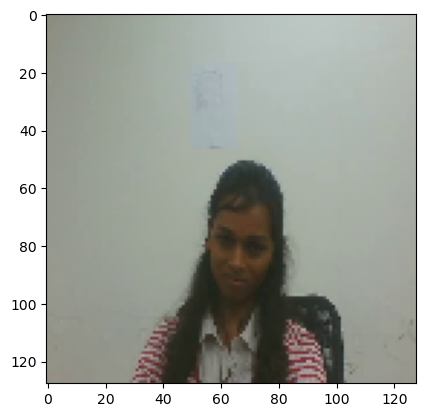

1/1 [==============================] - 1s 573ms/step
Predicted Emotion: Engagement (100.00%)
Probabilities for each emotion:
Boredom: 0.00%
Confusion: 0.00%
Engagement: 100.00%
Frustration: 0.00%


In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os

# Define the image size (same as used during training)
img_height, img_width = 128, 128

# Load the trained model
model = tf.keras.models.load_model('emotion_classification_model.h5')

# Function to load and preprocess an image
def load_and_preprocess_image(image_path):
    img = keras.utils.load_img(image_path, target_size=(img_height, img_width))
    img_array = keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis
    return img_array

# Path to a sample image from your dataset
image_path =r"C:\Users\HP\Downloads\iitb\9877360256_frame0.jpg"  # Replace with the actual path to the image

# Load and display the image
img_array = load_and_preprocess_image(image_path)
img = keras.utils.load_img(image_path, target_size=(img_height, img_width))
plt.imshow(img)
plt.show()

# Make predictions
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

# Get class indices
class_names = ['Boredom', 'Confusion', 'Engagement', 'Frustration']

# Print the predicted class and probability for each class
print(f"Predicted Emotion: {class_names[predicted_class[0]]} ({predictions[0][predicted_class[0]] * 100:.2f}%)")
print("Probabilities for each emotion:")
for i, prob in enumerate(predictions[0]):
    print(f"{class_names[i]}: {prob * 100:.2f}%")